# Central limit theorem

I want to "experimentally" test the central limit theorem. I will:
1) Create scores from -100 to 100  with the equal distribution and the normal distribution. Each score will contain 10 samples. So 2100 samples in total. 
2) Randomly pick 10, 30, 50, 100, 200 samples. I can pick whatever sample as many times as possible.
3) 

# Create uniform distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_uniform = np.random.randint(low=1, high=101, size=1000, dtype=int)

(0.0, 100.0)

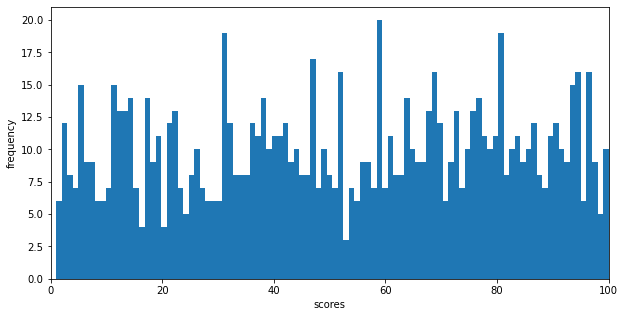

In [3]:
plt.figure(figsize=[10,5])
plt.hist(data_uniform, bins=100)
plt.xlabel('scores')
plt.ylabel('frequency')
plt.xlim([0,100])

## Descriptive statistics

In [4]:
np.mean(data_uniform)

51.93

In [5]:
np.median(data_uniform)

52.0

In [6]:
np.std(data_uniform)

28.818971182191774

# Randomly pick values

In [7]:
data_uniform.shape

(1000,)

In [8]:
pick_10 = np.random.choice(data_uniform, size=(10,), replace=True)
pick_50 = np.random.choice(data_uniform, size=(50,), replace=True)
pick_100 = np.random.choice(data_uniform, size=(100,), replace=True)

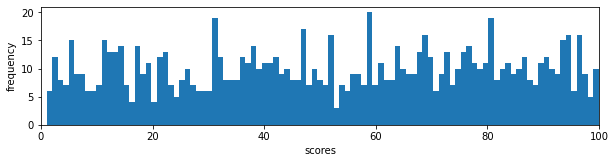

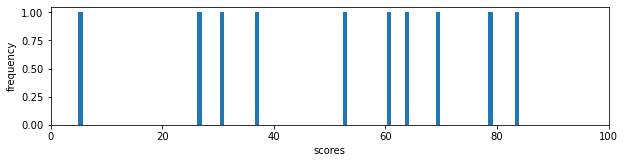

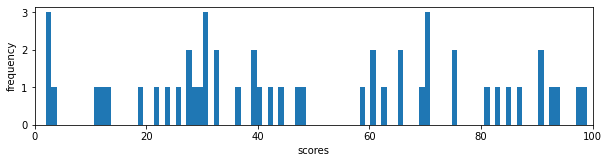

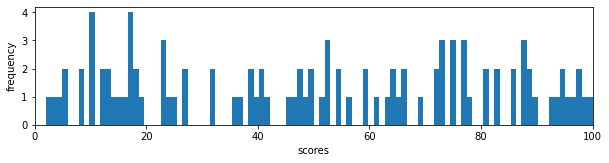

In [9]:
pick = [data_uniform, pick_10, pick_50, pick_100]

for i, pick_i in zip(range(4), pick):
    plt.figure(figsize=[10,10])
    plt.subplot(4,1,i+1)   
    plt.hist(pick_i, bins=100)
    plt.xlabel('scores')
    plt.ylabel('frequency')
    plt.xlim([0,100])

# Central limit theorem

In probability theory, the central limit theorem (CLT) establishes that, in many situations, when independent random variables are summed up, their properly normalized sum tends toward a normal distribution even if the original variables themselves are not normally distributed.
Source: https://en.wikipedia.org/wiki/Central_limit_theorem

In [10]:
steps = 10000

# create dictionary to randomly pick values
pick = {}
keys = [5,50,100]
for key in keys:
    pick[key] = []

# dictionary of means
means = {}
for key in keys:
    means[key] = []

In [11]:
means

{5: [], 50: [], 100: []}

In [12]:
for i in range(steps):
    
    # randomly pick variables with sample sizes of 10, 50, 100
    for key in pick.keys():
        pick[key] = np.random.choice(data_uniform, size=(key,), replace=True)    
    
    # calculate means
    for key in means.keys():
        means[key].append( np.mean(pick[key]) )

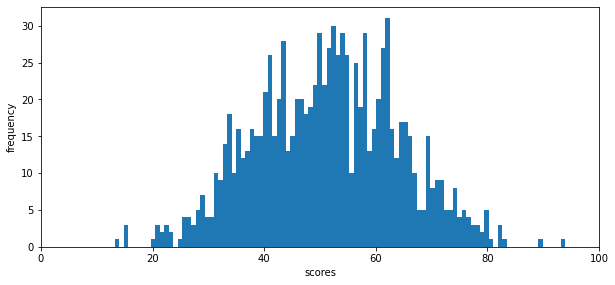

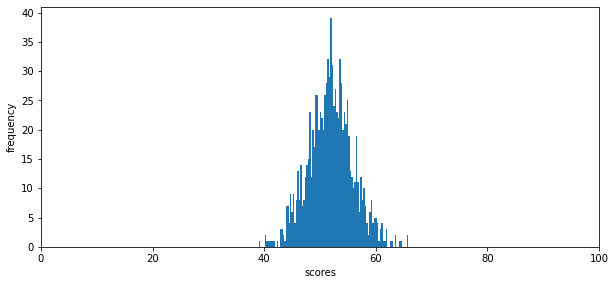

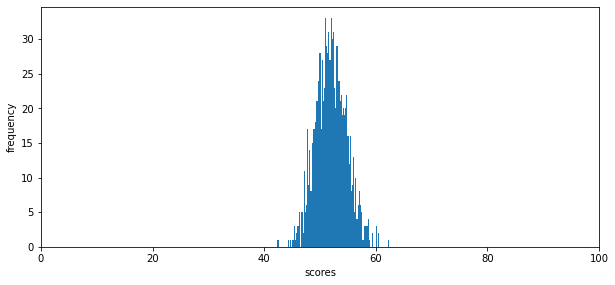

In [13]:
# try plotting histogram for this key and specified number of means
No_means = 1000

for i, key in zip(range(3), means.keys()):
    plt.figure(figsize=[10,15])
    plt.subplot(3,1,i+1)
    plt.hist(means[key][:No_means], bins=100)
    plt.xlabel('scores')
    plt.ylabel('frequency')
    plt.xlim([0,100])

# Confidence interval

Confidence interval is a range between two values that contains 95% of means. How do I calculate it in program? I need to sort all array. Then I ignore first p/2 and the last p/2.

In [14]:
for key in means.keys():
    print(f'{key}: respective mean of means {np.mean(means[key][1:1000])}')
    print(f'{key}: respective std of means {np.std(means[key][1:1000])}\n')

5: respective mean of means 51.32912912912913
5: respective std of means 12.797463710429582

50: respective mean of means 51.9452052052052
50: respective std of means 4.0744274065964845

100: respective mean of means 51.996996996997
100: respective std of means 2.793570838375145



## Sort means

In [15]:
means_sorted = {}

for key in means.keys():
    means_sorted[key] = sorted(means[key])

In [16]:
means[key][:10]

[48.49, 48.93, 52.31, 52.91, 50.34, 54.82, 53.4, 57.08, 52.71, 50.55]

In [17]:
means_sorted[key][:10]

[41.21, 41.89, 42.03, 42.05, 42.08, 42.25, 42.26, 42.49, 42.49, 42.6]

## Confidence interval

There are number of ways to select range where 95% of observations are located. However, let's find it so that the interval is as small as possible. I know that for normal distribution it has to be symmetrical from the mean. 

In summary, the confidence interval has to obey rules:
1) it has to cover % of observations
2) it has to be as tight as possible

In [18]:
p = 0.05
obser_in_range = int((1-p) * len(means_sorted[100]))

for key in means_sorted.keys():
    delta = []
    for i in range( int(len(means_sorted[key])*p)-1 ):

        lower_bound = means_sorted[key][i]
        upper_bound = means_sorted[key][i+obser_in_range]

        delta.append(upper_bound - lower_bound)

    k = np.argmin(delta)
    lower_bound = means_sorted[key][k]
    upper_bound = means_sorted[key][k+obser_in_range]
    print(f'{key} samples: confidence interval {[lower_bound, upper_bound]}')

5 samples: confidence interval [25.2, 75.6]
50 samples: confidence interval [44.06, 59.98]
100 samples: confidence interval [46.13, 57.43]


# Conclusion

It is a typical misconception that the confidence interval represent probability of some value lying within that range. My initial distribution was uniform. By taking samples with resampling, I proved the central miti theorem computationally for this instance. Confidence interval is usefull in null hypothesis. If I were to make the same computations on exponential distribution, I would have a different confidence interval.

Also, if number of samples is low, as it was the case with 5 samples, the resulting distribution will look different.